In [5]:
import warnings
warnings.filterwarnings('ignore')

from bs4 import BeautifulSoup
import requests

import pandas as pd

import time

In [2]:
liens = list()
for i in range(1, 701):
    url = "https://www.linternaute.com/ville/index/villes?page={}".format(i)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    mydivs = soup.find("ul", {"class": "list--2colcount list--bullet"})
    for i in mydivs.findAll('a'):
        liens.append(i['href'])

In [325]:
liens[0]

'https://www.linternaute.com/ville/aast/ville-64001'

In [101]:
cp = list()
pop = list()
label = list()
sup = list()

for i in liens:
    response = requests.get(i)
    soup = BeautifulSoup(response.text, "html.parser")
    mydivs = soup.findAll("tbody")
        
    cp.append(mydivs[0].text.split("\n"))
    pop.append(mydivs[1].text.split("\n"))
    label.append(mydivs[2].text.split("\n"))
    sup.append(mydivs[3].text.split("\n"))

In [148]:
print(len(cp))
print(len(pop))
print(len(label))
print(len(sup))

34955
34955
34955
34955


In [163]:
data = dict()
for i in range(34955):
    data[i] = cp[i] + pop[i] + label[i] + sup[i]

In [187]:
longueur = [len(data[i]) for i in range(len(data))]

In [188]:
import matplotlib.pyplot as plt

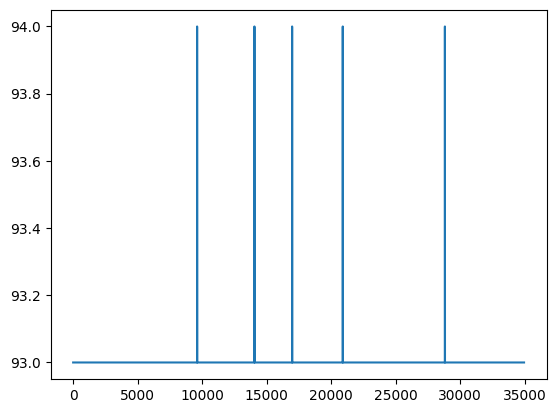

In [189]:
plt.plot(longueur)

In [208]:
uplen = [key for key in data if len(data[key]) > 93]

In [202]:
data.get("0")

In [209]:
uplen

[9610, 14054, 16975, 20901, 28818]

In [251]:
data[0][30:40]

['1\xa0964 hab.',
 '',
 '',
 'Population : rang national (2020)',
 'n°26\xa0663 ',
 '-',
 '',
 '',
 'Densité de population (2020)',
 '40 hab/km²']

In [253]:
data[9610][30:40]

['1\xa0964 hab.',
 '',
 '',
 'Population : rang national (2020)',
 'n°19\xa0310 ',
 '-',
 '',
 '',
 'Densité de population (2020)',
 '127 hab/km²']

In [243]:
del data[28818][25]

In [246]:
del data[9610][25]
del data[14054][25]
del data[16975][25]
del data[20901][25]

In [247]:
longueur = [len(data[i]) for i in range(len(data))]

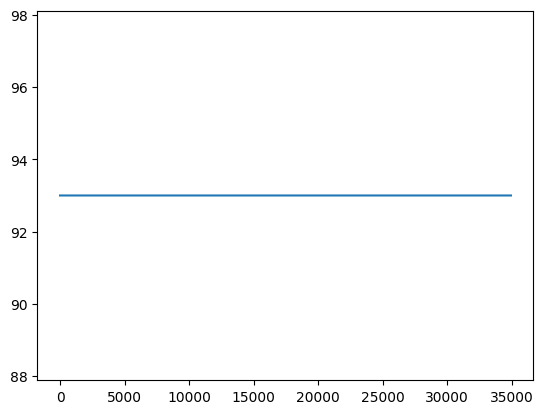

In [248]:
plt.plot(longueur)

In [256]:
df = pd.DataFrame(data)

In [259]:
df = df.T

In [308]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,,,Région,Nouvelle-Aquitaine,,,Département,Pyrénées-Atlantiques,,,...,Latitude,"43,2909",-,,,Longitude,"-0,081773",-,,
1,,,Région,Grand Est,,,Département,Meuse,,,...,Latitude,"48,5327",-,,,Longitude,"5,51525",-,,
2,,,Région,Hauts-de-France,,,Département,Nord,,,...,Latitude,"50,2369",-,,,Longitude,"3,20731",-,,
3,,,Région,Hauts-de-France,,,Département,Oise,,,...,Latitude,"49,6931",-,,,Longitude,"1,76924",-,,
4,,,Région,Grand Est,,,Département,Meurthe-et-Moselle,,,...,Latitude,"48,8928",-,,,Longitude,"6,2656",-,,


In [272]:
data[0]

['',
 '',
 'Région',
 'Nouvelle-Aquitaine',
 '',
 '',
 'Département',
 'Pyrénées-Atlantiques',
 '',
 '',
 'Etablissement public de coopération intercommunale (EPCI)',
 'Communauté de communes du Nord Est Béarn',
 '',
 '',
 'Code postal (CP)',
 '64460',
 '',
 '',
 'Code Insee',
 '64001',
 '',
 '',
 "Nom des habitants d'Aast (gentilé)",
 'Aastois, Aastoises',
 '',
 '',
 '',
 '',
 'Population (2020)',
 '188 hab.',
 '1\xa0964 hab.',
 '',
 '',
 'Population : rang national (2020)',
 'n°26\xa0663 ',
 '-',
 '',
 '',
 'Densité de population (2020)',
 '40 hab/km²',
 '170 hab/km²',
 '',
 '',
 'Taux de chômage (2019)',
 '5,8 %',
 '10,6 %',
 '',
 '',
 '',
 '',
 'Pavillon bleu',
 'non',
 '',
 '',
 "Ville d'art et d'histoire",
 'non',
 '',
 '',
 'Ville fleurie',
 'Aucune fleur',
 '',
 '',
 'Ville internet',
 'Aucune arobase',
 '',
 '',
 '',
 '',
 'Superficie (surface)',
 '4,8 km²',
 '17,5 km²',
 '',
 '',
 'Altitude min.',
 '367 mètre(s)',
 '193 mètres',
 '',
 '',
 'Altitude max.',
 '393 mètre(s)',
 '

In [287]:
vides = [i for i, val in enumerate(data[0]) if val=='']

In [313]:
tiret = [i for i, val in enumerate(data[0]) if val=='-']

In [311]:
df = df.drop(vides, axis = 1)

In [314]:
df = df.drop(tiret, axis = 1)

In [324]:
df.head()

,Région,Nouvelle-Aquitaine,Département,Pyrénées-Atlantiques,Etablissement public de coopération intercommunale (EPCI),Communauté de communes du Nord Est Béarn,Code postal (CP),64460,Code Insee,64001,...,Altitude min.,367 mètre(s),193 mètres,Altitude max.,393 mètre(s),395 mètres,Latitude,"43,2909",Longitude,"-0,081773"
0,Région,Nouvelle-Aquitaine,Département,Pyrénées-Atlantiques,Etablissement public de coopération intercommu...,Communauté de communes du Nord Est Béarn,Code postal (CP),64460,Code Insee,64001,...,Altitude min.,367 mètre(s),193 mètres,Altitude max.,393 mètre(s),395 mètres,Latitude,"43,2909",Longitude,"-0,081773"
1,Région,Grand Est,Département,Meuse,Etablissement public de coopération intercommu...,Communauté de communes Haute Saulx et Perthois...,Code postal (CP),55130,Code Insee,55001,...,Altitude min.,282 mètre(s),193 mètres,Altitude max.,388 mètre(s),395 mètres,Latitude,"48,5327",Longitude,"5,51525"
2,Région,Hauts-de-France,Département,Nord,Etablissement public de coopération intercommu...,Communauté d'agglomération de Cambrai,Code postal (CP),59268,Code Insee,59001,...,Altitude min.,36 mètre(s),193 mètres,Altitude max.,70 mètre(s),395 mètres,Latitude,"50,2369",Longitude,"3,20731"
3,Région,Hauts-de-France,Département,Oise,Etablissement public de coopération intercommu...,Communauté de communes de la Picardie Verte,Code postal (CP),60220,Code Insee,60001,...,Altitude min.,170 mètre(s),193 mètres,Altitude max.,222 mètre(s),395 mètres,Latitude,"49,6931",Longitude,"1,76924"
4,Région,Grand Est,Département,Meurthe-et-Moselle,Etablissement public de coopération intercommu...,Communauté de communes de Seille et Mauchère -...,Code postal (CP),54610,Code Insee,54001,...,Altitude min.,182 mètre(s),193 mètres,Altitude max.,235 mètre(s),395 mètres,Latitude,"48,8928",Longitude,"6,2656"


In [320]:
df.iloc[0].values

array(['Région', 'Nouvelle-Aquitaine', 'Département',
       'Pyrénées-Atlantiques',
       'Etablissement public de coopération intercommunale (EPCI)',
       'Communauté de communes du Nord Est Béarn', 'Code postal (CP)',
       '64460', 'Code Insee', '64001',
       "Nom des habitants d'Aast (gentilé)", 'Aastois, Aastoises',
       'Population (2020)', '188 hab.', '1\xa0964 hab.',
       'Population : rang national (2020)', 'n°26\xa0663 ',
       'Densité de population (2020)', '40 hab/km²', '170 hab/km²',
       'Taux de chômage (2019)', '5,8 %', '10,6 %', 'Pavillon bleu',
       'non', "Ville d'art et d'histoire", 'non', 'Ville fleurie',
       'Aucune fleur', 'Ville internet', 'Aucune arobase',
       'Superficie (surface)', '4,8 km²', '17,5 km²', 'Altitude min.',
       '367 mètre(s)', '193 mètres', 'Altitude max.', '393 mètre(s)',
       '395 mètres', 'Latitude', '43,2909', 'Longitude', '-0,081773'],
      dtype=object)

In [322]:
df.columns = df.iloc[0].values

In [326]:
columns_drop = ['Région', 'Département', 'Etablissement public de coopération intercommunale (EPCI)', 'Code postal (CP)', 'Code Insee',
               "Nom des habitants d'Aast (gentilé)", "Population (2020)", "Densité de population (2020)", 'Taux de chômage (2019)',
               'Pavillon bleu', "Ville d'art et d'histoire", "Ville fleurie", "Ville internet", "Superficie (surface)", "Altitude min.",
               "Altitude max.", "Latitude", "Longitude"]

In [327]:
df = df.drop(columns_drop, axis = 1)

In [328]:
df.head()

,Nouvelle-Aquitaine,Pyrénées-Atlantiques,Communauté de communes du Nord Est Béarn,64460,64001,"Aastois, Aastoises",188 hab.,1 964 hab.,Population : rang national (2020),n°26 663,...,Aucune fleur,Aucune arobase,"4,8 km²","17,5 km²",367 mètre(s),193 mètres,393 mètre(s),395 mètres,"43,2909","-0,081773"
0,Nouvelle-Aquitaine,Pyrénées-Atlantiques,Communauté de communes du Nord Est Béarn,64460,64001,"Aastois, Aastoises",188 hab.,1 964 hab.,Population : rang national (2020),n°26 663,...,Aucune fleur,Aucune arobase,"4,8 km²","17,5 km²",367 mètre(s),193 mètres,393 mètre(s),395 mètres,"43,2909","-0,081773"
1,Grand Est,Meuse,Communauté de communes Haute Saulx et Perthois...,55130,55001,"Abainvillois, Abainvilloises",285 hab.,1 964 hab.,Population : rang national (2020),n°22 397,...,Aucune fleur,Aucune arobase,"13,7 km²","17,5 km²",282 mètre(s),193 mètres,388 mètre(s),395 mètres,"48,5327","5,51525"
2,Hauts-de-France,Nord,Communauté d'agglomération de Cambrai,59268,59001,"Abancourtois, Abancourtoises",468 hab.,1 964 hab.,Population : rang national (2020),n°17 217,...,Aucune fleur,Aucune arobase,"5,7 km²","17,5 km²",36 mètre(s),193 mètres,70 mètre(s),395 mètres,"50,2369","3,20731"
3,Hauts-de-France,Oise,Communauté de communes de la Picardie Verte,60220,60001,nc,606 hab.,1 964 hab.,Population : rang national (2020),n°14 521,...,Aucune fleur,Aucune arobase,"6,0 km²","17,5 km²",170 mètre(s),193 mètres,222 mètre(s),395 mètres,"49,6931","1,76924"
4,Grand Est,Meurthe-et-Moselle,Communauté de communes de Seille et Mauchère -...,54610,54001,"Abaucourtois, Abaucourtoises",306 hab.,1 964 hab.,Population : rang national (2020),n°21 651,...,Aucune fleur,Aucune arobase,"7,8 km²","17,5 km²",182 mètre(s),193 mètres,235 mètre(s),395 mètres,"48,8928","6,2656"


In [333]:
df.columns

Index(['Nouvelle-Aquitaine', 'Pyrénées-Atlantiques',
       'Communauté de communes du Nord Est Béarn', '64460', '64001',
       'Aastois, Aastoises', '188 hab.', '1 964 hab.',
       'Population : rang national (2020)', 'n°26 663 ', '40 hab/km²',
       '170 hab/km²', '5,8 %', '10,6 %', 'non', 'non', 'Aucune fleur',
       'Aucune arobase', '4,8 km²', '17,5 km²', '367 mètre(s)', '193 mètres',
       '393 mètre(s)', '395 mètres', '43,2909', '-0,081773'],
      dtype='object')

In [352]:
dic_columns = {
    "Nouvelle-Aquitaine" : "region",
    "Pyrénées-Atlantiques'" : "departement",
    "ommunauté de communes du Nord Est Béarn" : "epci",
    "64460" : "code_p",
    "64001" : "code_i",
    "Aastois, Aastoises" : "nom_habit",
    "188 hab." : "population",
    "1 964 hab." : "pop_moy",
    "Population : rang national (2020)" : "pop_rang_nat2020",
    "n°26 663 ":"pop_rang_nat",
    "40 hab/km²" : "densite_pop",
    "170 hab/km²" : "densite_pop_moy",
    "5,8 %" : "taux_chomage",
    "10,6 %" : "taux_chomage_moy",
    "non" : "pavion_bleau",
    "nosn" : "ville_d_art",
    "Aucune fleur" : "ville_fleurie",
    "Aucune arobase" : "ville_internet",
    "4,8 km²" : "superficie",
    "17,5 km²" : "superficie_moy",
    "367 mètre(s)" : "altitude_min",
    "193 mètres" : "altitude_min_moy",
    "393 mètre(s)" : "altitude_max",
    "395 mètre(s)" : "altitude_max_moy",
    "43,2909" : "latitude",
    "-0,081773" : "longitude",
}

In [353]:
new_l = list(dic_columns.values())

In [355]:
len(new_l)

26

In [356]:
df.columns = new_l

In [357]:
df.head()

,region,departement,epci,code_p,code_i,nom_habit,population,pop_moy,pop_rang_nat2020,pop_rang_nat,...,ville_fleurie,ville_internet,superficie,superficie_moy,altitude_min,altitude_min_moy,altitude_max,altitude_max_moy,latitude,longitude
0,Nouvelle-Aquitaine,Pyrénées-Atlantiques,Communauté de communes du Nord Est Béarn,64460,64001,"Aastois, Aastoises",188 hab.,1 964 hab.,Population : rang national (2020),n°26 663,...,Aucune fleur,Aucune arobase,"4,8 km²","17,5 km²",367 mètre(s),193 mètres,393 mètre(s),395 mètres,"43,2909","-0,081773"
1,Grand Est,Meuse,Communauté de communes Haute Saulx et Perthois...,55130,55001,"Abainvillois, Abainvilloises",285 hab.,1 964 hab.,Population : rang national (2020),n°22 397,...,Aucune fleur,Aucune arobase,"13,7 km²","17,5 km²",282 mètre(s),193 mètres,388 mètre(s),395 mètres,"48,5327","5,51525"
2,Hauts-de-France,Nord,Communauté d'agglomération de Cambrai,59268,59001,"Abancourtois, Abancourtoises",468 hab.,1 964 hab.,Population : rang national (2020),n°17 217,...,Aucune fleur,Aucune arobase,"5,7 km²","17,5 km²",36 mètre(s),193 mètres,70 mètre(s),395 mètres,"50,2369","3,20731"
3,Hauts-de-France,Oise,Communauté de communes de la Picardie Verte,60220,60001,nc,606 hab.,1 964 hab.,Population : rang national (2020),n°14 521,...,Aucune fleur,Aucune arobase,"6,0 km²","17,5 km²",170 mètre(s),193 mètres,222 mètre(s),395 mètres,"49,6931","1,76924"
4,Grand Est,Meurthe-et-Moselle,Communauté de communes de Seille et Mauchère -...,54610,54001,"Abaucourtois, Abaucourtoises",306 hab.,1 964 hab.,Population : rang national (2020),n°21 651,...,Aucune fleur,Aucune arobase,"7,8 km²","17,5 km²",182 mètre(s),193 mètres,235 mètre(s),395 mètres,"48,8928","6,2656"


In [361]:
df = df.drop(["nom_habit", "departement", "pop_moy", "pop_rang_nat2020", "pop_rang_nat", "densite_pop_moy", "taux_chomage_moy",
        "superficie_moy", "altitude_min_moy", "altitude_max_moy"], axis = 1)

In [548]:
df.head()

,region,code_p,code_i,population,densite_pop,taux_chomage,pavion_bleau,ville_d_art,ville_fleurie,ville_internet,superficie,altitude_min,altitude_max,latitude,longitude
0,Nouvelle-Aquitaine,64460,64001,188.0,40.0,5.8,non,non,0.0,0.0,4.8,367.0,393.0,43.2909,-0.081773
1,Grand Est,55130,55001,285.0,21.0,10.1,non,non,0.0,0.0,13.7,282.0,388.0,48.5327,5.51525
2,Hauts-de-France,59268,59001,468.0,83.0,8.4,non,non,0.0,0.0,5.7,36.0,70.0,50.2369,3.20731
3,Hauts-de-France,60220,60001,606.0,101.0,20.3,non,non,0.0,0.0,6.0,170.0,222.0,49.6931,1.76924
4,Grand Est,54610,54001,306.0,39.0,8.1,non,non,0.0,0.0,7.8,182.0,235.0,48.8928,6.2656


In [378]:
df["region"] = df["region"].astype("category")

In [383]:
df.drop("epci", axis = 1, inplace=True)

In [386]:
df["code_p"] = df["code_p"].astype("category")

In [391]:
df["code_i"] = df["code_i"].astype("category")

In [396]:
df["population"] = df["population"].astype('string')

In [440]:
df["population"] = df["population"].map(lambda x: x[:-4])

In [447]:
df["population"] = pd.to_numeric(df["population"], errors = "coerce")

In [448]:
df["densite_pop"] = df["densite_pop"].astype('string')

In [454]:
df["densite_pop"] = df["densite_pop"].map(lambda x: x[:-7])

In [455]:
df["densite_pop"] = pd.to_numeric(df["densite_pop"], errors = "coerce")

In [518]:
df["taux_chomage"] = df["taux_chomage"].astype('string')

In [526]:
df["taux_chomage"] = df["taux_chomage"].str.replace(" %", "").str.replace(",", ".")

In [527]:
df["taux_chomage"] = pd.to_numeric(df["taux_chomage"], errors = "coerce")

In [459]:
df["pavion_bleau"] = df["pavion_bleau"].astype("category")

In [463]:
df["ville_d_art"] = df["ville_d_art"].astype("category")

In [465]:
df["ville_fleurie"] = df["ville_fleurie"].astype('string')

In [469]:
df["ville_fleurie"] = df["ville_fleurie"].map(lambda x: x[:-8])

In [471]:
df["ville_fleurie"] = pd.to_numeric(df["ville_fleurie"], errors = "coerce")

In [473]:
df["ville_fleurie"] = df["ville_fleurie"].fillna(0)

In [486]:
df["ville_fleurie"] = df["ville_fleurie"].astype("category")

In [478]:
df["ville_internet"] = df["ville_internet"].map(lambda x: x[0])

In [479]:
df["ville_internet"] = pd.to_numeric(df["ville_internet"], errors = "coerce")

In [481]:
df["ville_internet"] = df["ville_internet"].fillna(0)

In [488]:
df["ville_internet"]  = df["ville_internet"].astype("category")

In [493]:
df["superficie"] = df["superficie"].map(lambda x : x[:-3])

In [495]:
df["superficie"] = df["superficie"].str.replace(',', '.')

In [496]:
df["superficie"]  = pd.to_numeric(df["superficie"] , errors = "coerce")

In [505]:
df["altitude_min"] = df["altitude_min"].map(lambda x: x[:-8])
df["altitude_min"]  = pd.to_numeric(df["altitude_min"] , errors = "coerce")

In [508]:
df["altitude_max"] = df["altitude_max"].map(lambda x: x[:-8])
df["altitude_max"]  = pd.to_numeric(df["altitude_max"] , errors = "coerce")

In [511]:
df["latitude"] = df["latitude"].str.replace(",", ".")

In [513]:
df["longitude"] = df["longitude"].str.replace(",", ".")

In [531]:
df["population"] = df["population"].fillna(df["population"].median())

In [536]:
df["densite_pop"] = df["densite_pop"].fillna(df["densite_pop"].median())

In [538]:
df["taux_chomage"] = df["taux_chomage"].fillna(df["taux_chomage"].median())

In [540]:
df["superficie"] = df["superficie"].fillna(df["superficie"].median())

In [542]:
df["altitude_min"] = df["altitude_min"].fillna(df["altitude_min"].median())

In [543]:
df["altitude_max"] = df["altitude_max"].fillna(df["altitude_max"].median())

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34955 entries, 0 to 34954
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   region          34955 non-null  category
 1   code_p          34955 non-null  category
 2   code_i          34955 non-null  category
 3   population      34955 non-null  float64 
 4   densite_pop     34955 non-null  float64 
 5   taux_chomage    34955 non-null  Float64 
 6   pavion_bleau    34955 non-null  category
 7   ville_d_art     34955 non-null  category
 8   ville_fleurie   34955 non-null  category
 9   ville_internet  34955 non-null  category
 10  superficie      34955 non-null  float64 
 11  altitude_min    34955 non-null  float64 
 12  altitude_max    34955 non-null  float64 
 13  latitude        34955 non-null  object  
 14  longitude       34955 non-null  object  
dtypes: Float64(1), category(7), float64(5), object(2)
memory usage: 5.3+ MB


In [550]:
df.isna().sum()

region            0
code_p            0
code_i            0
population        0
densite_pop       0
taux_chomage      0
pavion_bleau      0
ville_d_art       0
ville_fleurie     0
ville_internet    0
superficie        0
altitude_min      0
altitude_max      0
latitude          0
longitude         0
dtype: int64

In [551]:
!pip install dash

     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     -- ------------------------------------- 0.6/10.3 MB 18.8 MB/s eta 0:00:01
     ------ --------------------------------- 1.6/10.3 MB 20.2 MB/s eta 0:00:01
     ---------- ----------------------------- 2.7/10.3 MB 21.9 MB/s eta 0:00:01
     ---------------- ----------------------- 4.2/10.3 MB 24.3 MB/s eta 0:00:01
     ---------------------- ----------------- 5.8/10.3 MB 26.4 MB/s eta 0:00:01
     ---------------------------- ----------- 7.4/10.3 MB 28.0 MB/s eta 0:00:01
     ----------------------------------- ---- 9.2/10.3 MB 29.5 MB/s eta 0:00:01
     --------------------------------------  10.3/10.3 MB 31.2 MB/s eta 0:00:01
     --------------------------------------- 10.3/10.3 MB 26.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
     ------ --------------------------------- 2.3/15.3 MB 49.0 MB/s eta 0:00:01
     ----------- ---------------------------- 4.5/15.3 M